# Итоговая контрольная работа по блоку специализация аналитик.

# Задача № 1. Ваш продукт - это школа английского языка Лендинг для языковой школы. Проанализируйте конкурентов на рынке (SkyEng, Lingvoleo и прочие) и сформулируйте гипотезу по улучшению первого экрана лендинг.

Если на странице лендинга школы английского языка в шапке добавить блок с контактими для связи с менеджером, то % показателя отказов снизится на 10% а конверсия в подачу заявки увеличится на 5%, потому что по результатам интервью, пользователей в первую очередь интересуют подробности программы, по которой обучаются студенты.

# Задача № 2. Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск: Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите менеджеру?

In [3]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import shapiro

import statsmodels as sm
from statsmodels.stats.power import TTestIndPower

import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, \
    kendalltau, f_oneway, kruskal

from os import replace

In [4]:
# Чтение файла
df = pd.read_csv('ab_stats.csv')

In [5]:
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


## Анализ и предобработка данных

revenue - доход

num_purchases - количество покупок

purchase - факт покупки

ab_group - разделение на контроль и тест А и В

av_site visit - среднее количество посещений сайта пользователями


Выведем статистику

In [6]:
df.shape

(23652, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [8]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


видим, что в столбце av_site visit есть отрицательные данные

In [9]:
# удалим строки с отрицательными значениями в столбце av_site visit, так как не может быть отрицательных значений
df = df.loc[df['av_site visit']>=0]
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23184.000000,23184.000000,23184.000000,23184.000000
mean,0.326511,0.043780,0.020704,7.188254
std,9.645839,1.089462,0.142394,2.924011
min,0.000000,0.000000,0.000000,0.008679
25%,0.000000,0.000000,0.000000,5.314379
50%,0.000000,0.000000,0.000000,7.068656
75%,0.000000,0.000000,0.000000,8.910900
max,1303.609284,152.000000,1.000000,22.446822


In [10]:
df.shape

(23184, 5)

Проверка на пустые строки

In [11]:
df.isna().sum()

revenue          0
num_purchases    0
purchase         0
ab_group         0
av_site visit    0
dtype: int64

пустых строк нет

Рассмортим отдельно каждый столбец.

### revenue - доход

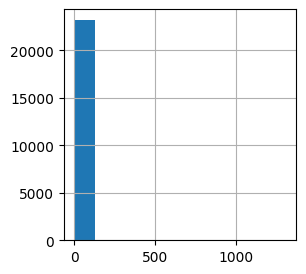

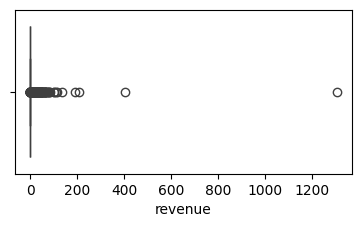

In [12]:
# посмотрим на график распрадалания значений этого столбца.
df['revenue'].hist(figsize=(3, 3));
plt.figure(figsize = (20,20))
for i,col in enumerate(['revenue']):
    plt.subplot(8,4,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

видим выброс в значении больше 1200

In [13]:
# Удалим выброс
df = df.loc[df['revenue']<1200]
df.shape

(23183, 5)

### num_purchases	- количество покупок

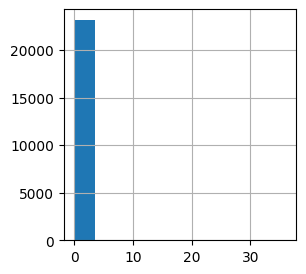

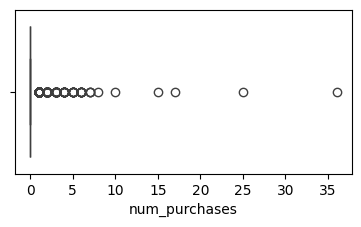

In [14]:
# посмотрим на график распрадалания значений этого столбца.
df['num_purchases'].hist(figsize=(3, 3));
plt.figure(figsize = (20,20))
for i,col in enumerate(['num_purchases']):
    plt.subplot(8,4,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

выбросов нет

### purchase - факт покупки (0 или 1)

0    22704
1      479
Name: purchase, dtype: int64

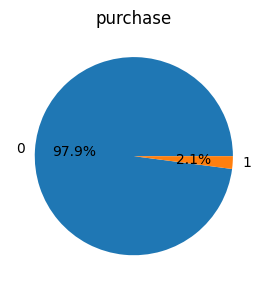

In [15]:
# Выведем в виде таблицы и круговой диаграммы все значения и их количество
df.purchase.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(3,3))
plt.title('purchase')
plt.tight_layout()
plt.axis('off');
df.purchase.value_counts()

видим, что процент платящих очень низкий

### ab_group - разделение на контроль и тест А и В

A    11828
B    11355
Name: ab_group, dtype: int64

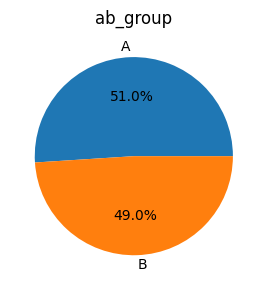

In [16]:
# Выведем в виде таблицы и круговой диаграммы все значения и их количество
df.ab_group.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(3,3))
plt.title('ab_group')
plt.tight_layout()
plt.axis('off');
df.ab_group.value_counts()

данные котроль и тест распределены поровну, это упрощает дальнейший анализ

In [17]:
# Выведем статистику отдельно по двум группам пользователей
df[df['ab_group']=='A'].describe() # контрольная группа

,revenue,num_purchases,purchase,av_site visit
count,11828.000000,11828.000000,11828.000000,11828.000000
mean,0.294488,0.037876,0.021559,6.980447
std,5.382614,0.450006,0.145245,2.004522
min,0.000000,0.000000,0.000000,0.145466
25%,0.000000,0.000000,0.000000,5.657543
50%,0.000000,0.000000,0.000000,6.984166
75%,0.000000,0.000000,0.000000,8.346435
max,401.640000,36.000000,1.000000,17.728836


In [18]:
df[df['ab_group']!='A'].describe() # тестовая группа

,revenue,num_purchases,purchase,av_site visit
count,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.245093,0.036548,0.019727,7.404806
std,3.192299,0.422820,0.139067,3.630412
min,0.000000,0.000000,0.000000,0.008679
25%,0.000000,0.000000,0.000000,4.746728
50%,0.000000,0.000000,0.000000,7.262590
75%,0.000000,0.000000,0.000000,9.889165
max,113.830000,25.000000,1.000000,22.446822


по предварительному анализу видно, что в группе А показатели лучше: больше средний и максимальный чек, больше количество покупок.

### av_site visit - среднее количество посещений сайта пользователями

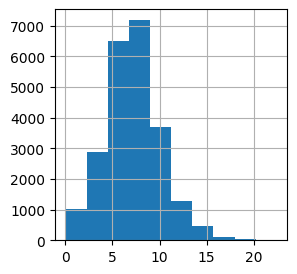

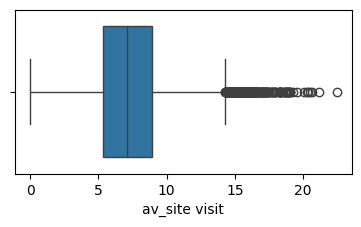

In [19]:
# посмотрим на график распрадалания значений этого столбца (мы удалили в нем отрицательные значения)
df['av_site visit'].hist(figsize=(3, 3));
plt.figure(figsize = (20,20))
for i,col in enumerate(['av_site visit']):
    plt.subplot(8,4,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

большинство пользователей просматривало сайт 5-10 раз

<ipython-input-20-aee8f9978c02>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='revenue', y='ab_group', inner='box', palette='Dark2')


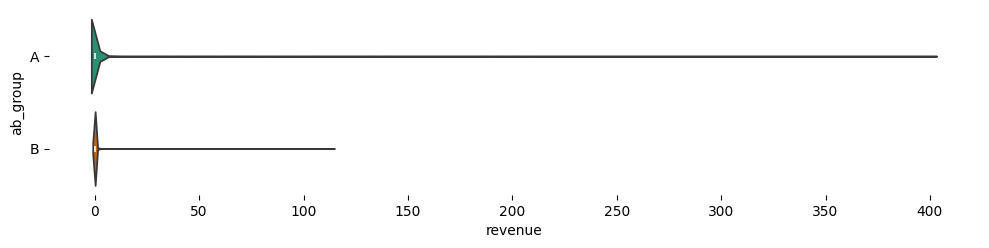

In [20]:
# Итоговый вид датасета представим следующим образом:
figsize = (12, 1.2 * len(df['ab_group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='revenue', y='ab_group', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [21]:
# Создадим два списка с тестовыми и контрольными данными платящих пользователей

df_test = df['revenue'][df['ab_group']=='B'][df['purchase'] == 1] # Здесь данные теста
df_control = df['revenue'][df['ab_group']!='B'][df['purchase'] == 1]  # Здесь данные пользователей, к которым не применялись изменения на сайте

In [22]:
df_test.describe()

count    224.000000
mean      12.424248
std       19.153743
min        0.259373
25%        2.286042
50%        3.980000
75%       12.462425
max      113.830000
Name: revenue, dtype: float64

In [23]:
df_control.describe()

count    255.000000
mean      13.659603
std       34.143331
min        0.259689
25%        2.318171
50%        4.282440
75%       11.565418
max      401.640000
Name: revenue, dtype: float64

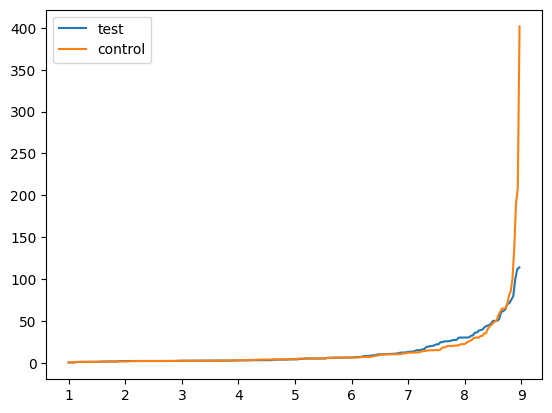

Средний ARPPU в тесте: 12.424248013392852, в контроле: 13.659602698039214.
Общее среднее = 13.081900298538615


In [24]:
# постоим график и сравним доходы в обеих группах, предварительно отсортировав их по возрастанию
test= np.sort(df_test)
control= np.sort(df_control)

plt.plot(np.linspace(1, 9, len(test), endpoint=False), test, label = 'test')
plt.plot(np.linspace(1, 9, len(control), endpoint=False), control, label = 'control')

plt.legend()
plt.show()
print(f'Средний ARPPU в тесте: {df_test.mean()}, в контроле: {df_control.mean()}.')
print(f'Общее среднее = {np.mean(np.concatenate([df_test, df_control]))}')

## Выводы по анализу датасета

В датасете содержатся сведения о пользователях сайта и результатах А-В теста. В процессе предобработки данных датасет был проверен на пропуски и отрицательные значения. Из датасета были удалены строки, содержащие отрицательные значения в столбце av_site visit. Обнаруженный выброс в столбце revenue был также удален. Из датасета было создано 2 списка данных, состоящих только из платящих пользователей и их дохода в контрольной и тестовой группе для дальнейшего анализа.

## Применение статистических критериев

ARPPU (Average Revenue Per Paying User): средняя прибыль с одного **платящего** пользователя. Вычисляется по формуле: ARPPU = revenue/PU, где PU — общее количество уникальных пользователей, заплативших за контент в приложении. Платящий пользователь указан в столбце purchase (в виде 1)

Прежде чем приступить к статистической оценке разницы ARPPU, стоит рассмотреть наличие статистической взаимосвязи между двумя независимыми выборками.

In [25]:
# Прежде всего необходимо определить тип распределения.
# Воспльзуемся тестом на нормальность с помощью функции shapiro
alpha = .05 # зададим уровень значимости в 5%
# H0: распределение нормальное
df_shapiro = shapiro(df['revenue'][df['purchase'] == 1]) # обращаемся ко всей выборке "revenue" среди заплативших (purchase = 1) пользователей из нашего датасета
print(f'P-Value = {df_shapiro[1]}')
print('Распределение {}нормальное\n'.format( {True: 'не ',
False: ''}[df_shapiro[1] < alpha]));

P-Value = 7.819312693258767e-37
Распределение не нормальное



То же самое можно увидеть на графике - данные распределены не нормально:

<Axes: xlabel='revenue', ylabel='Count'>

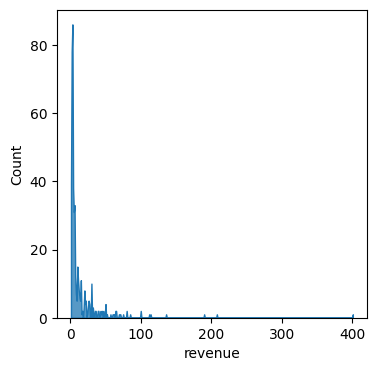

In [26]:
fig, ax = plt.subplots(figsize=(4,4))
sns.histplot(df['revenue'][df['purchase'] == 1],stat='count',binwidth=1,multiple="dodge",element ="poly")

In [27]:
# Допущение однородности дисперсии
# H0: дисперсия однородна
pvalue = levene(df_test,df_control)
print(f'P-Value = {pvalue[1]}')
print('Однородность дисперсии между вдумя выборками {}установлена\n'.format( {True: 'не ',
False: ''}[pvalue[1] < alpha]));

P-Value = 0.6481333642924176
Однородность дисперсии между вдумя выборками установлена



Так как распределение не нормальное, а дисперсии однородны, то для определения наличия статистической взаимосвязи между двумя независимыми выборками будем использовать непараметрический критерий Манна-Уитни с помощью функции mannwhitneyu из библиотеки scipy.stats:

In [28]:
# H0: Статистическая разница между вдумя выборками не существует
mw = stats.mannwhitneyu(x = df_test, y = df_control)
print(f'P-Value = {mw[1]}')
print('Статистическая разница между вдумя выборками {}установлена\n'.format( {True: 'не ',
False: ''}[mw[1] > alpha]));

P-Value = 0.8436507725422477
Статистическая разница между вдумя выборками не установлена



Так как p-value >0.05 то мы приманием нулевую гипотезу об отсутствии статистической разницы между значениями двух выборок

## Выводы. Рекомендации.

Так как в результате проведенного эксперимента между двумя группами отсутствует статистически значимая разница, я бы не рекомендовал применять на практике тестируемое изменение и провести тест повторно, перепроверив корректность его выполнения.

# Задача 3. Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%, мы ожидаем прирост в 0,2%. Уровень доверия 97% и уровень мощности 87%. Всего на наш продукт заходит 40 000 пользователей в месяц.

## 3.1. За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по результатам подсчета?

Рассчитаем количество пользователей для запуска эксперимента. Исходные данные: конверсия до эксперимента 5%, ожидаемый прирост 0,2%. Достоверность 97%, мощность теста 87%. Для рассчета используем калькулятор размера выборки.



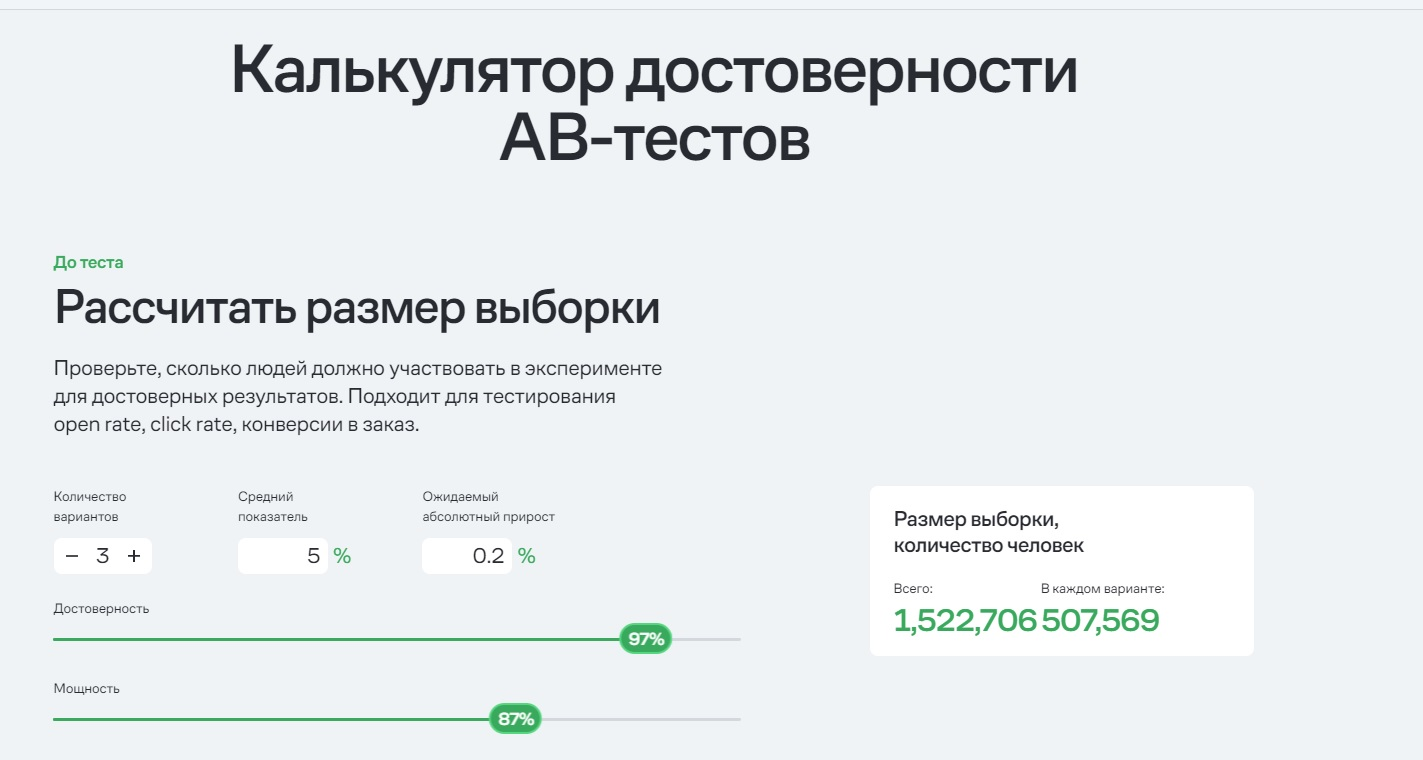

видим, что для проведения теста потребуется 1 522 706 посетителей,

а в месяц сайт посещают 40 000 пользователей

In [29]:
# чтобы найти количество дней для проведения эксперимента найдем количество пользователей в сутки:
user_day = 40000 / 30
# теперь найдем количество дней:
N = (1522706/user_day)
N/365

3.1288479452054796

Для проведения теста потребуется 3 года и 2 месяца - это очень долго.

Рекомендации:

1. Провести тест не для трех источников трафика, а для двух.

2. Увеличить ожидаемый прирост конверсии.

3. Уменьшить достоверность и мощность теста.


P.S. Решил проверить в GPT Chat, так как показалось, что допустил ошибку в онлайн-калькуляторе. Ведь 3 года для АБ теста - это слишком много!

И вот что он мне ответил:

1. Используем онлайн калькулятор для расчета объема выборки. Для уровня статистической значимости 97% и уровня мощности 87%, необходимый размер выборки для каждой группы составляет около 18 000 пользователей. Таким образом, общий объем выборки для трех групп составит около 54 000 пользователей.

2. Оценим, сколько времени потребуется для проведения теста:
- Всего пользователей в месяц: 40 000
- Общий объем выборки для трех групп: 54 000

3. Учитывая, что в месяц на продукт заходит 40 000 пользователей, и общий объем выборки для теста составляет 54 000 пользователей, то для проведения теста потребуется примерно 1,5 месяца (54 000 / 40 000 = 1,35).


Не могу судить о правильности своего решения, но я несколько раз перепроверил калькулятор. Решил оставить свой ответ без изменений.

## 3.2. Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите результаты тестирования, если у нас следующие результаты по количеству конверсии:

1) 25 000

2) 30 000

3) 32 000

Воспользуемся тем же калькулятором

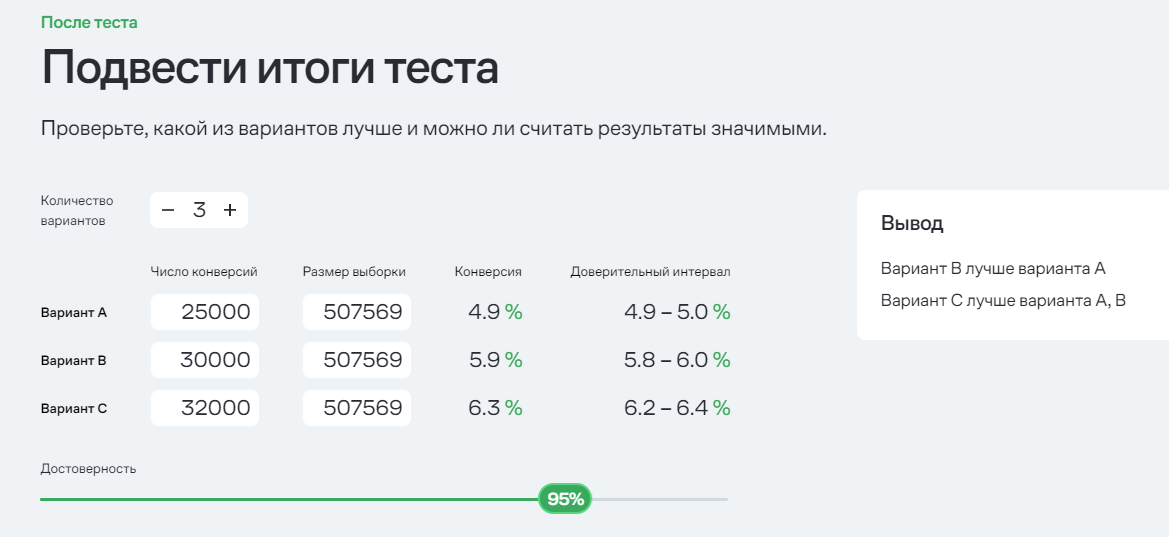

Вариант С лучше.

# Задача 4. Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в каждой группе.
Для проверки нормальности распределения на выборке в 2350 наблюдений применили
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.
Какой бы вывод мы могли сделать в данном случае?
В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше всего подойдёт и почему ?

Вывод: так как p-value меньше alpha, то при уровне статистической значимости 95% следует отклонить нулевую гипотезу о нормальности распределения данных. Таким образом, данные в выборке распределены не нормально.

Для проверки гипотезы следует выбрать один из непараметрических тестов. При сравнении двух независимых выборок лучше всего подойдет критерий Манна-Уитни.

# Задача 5. Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы получили следующие данные. Является ли результат статистически значимым с уровнем доверия 80%? Какую версию мы выкатим на продакшн?
A) Средняя - 360, отклонение - 40, количество - 9802

B) Средняя - 352, отклонение - 58, количество - 9789

In [30]:
# По условию:
m1 = 360
m2 = 352
d1 = 40
d2 = 58
n1 = 9802
n2 = 9789

Для определения статистической значимости результатов АБ-теста при известном стандартном отклонении можно использовать Z-тест для сравнения двух средних значений.

In [31]:
# Сначала вычислим стандартную ошибку среднего для каждой версии: Стандартная ошибка = отклонение / sqrt(количество)
s1 = d1 / (np.sqrt(n1)) # для версии А
s2 = d2 / (np.sqrt(n2)) # для версии В

In [32]:
# Теперь вычислим Z-статистику для разности двух средних значений:
Z = (m1-m2) / np.sqrt(s1**2 + s2**2)
Z

11.236630785707332

In [33]:
# Найдем критическое значение z-критерия при статистической значимости 80%
alpha = 0.20
z_critical = norm.ppf(1 - alpha/2) # Для двустороннего теста
z_critical

1.2815515655446004

Так как полученное значение Z (11.23) превышает критическое значение, результат является статистически значимым на уровне доверия 80%.

Так же решить эту задачу можно с помощью онлайн-калькулятора Эвана-Миллера:

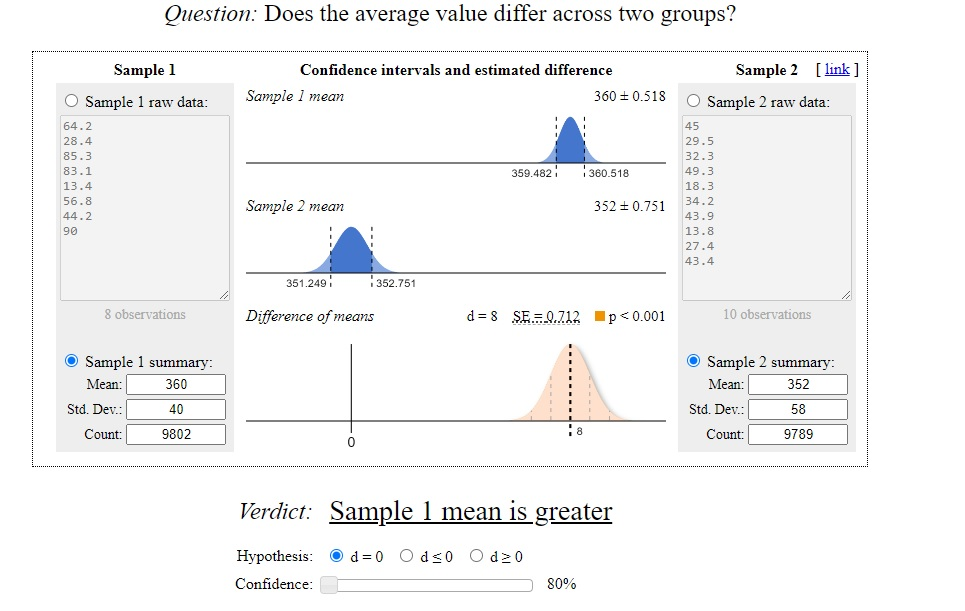



Вывод: рекомендуется выбрать версию A (со средним временем на пользователя 360), так как она показала статистически значимое увеличение времени, проведенного пользователями на сайте.

# Задача 6. Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны пользователя.
На схеме необходимо отобразить:

1) Управленческий процесс по договоренностям с внешними партнерами

2) Архитектуру данных с указанием систем, из которых будем скачивать данные

3) Внутрикомандное взаимодействие

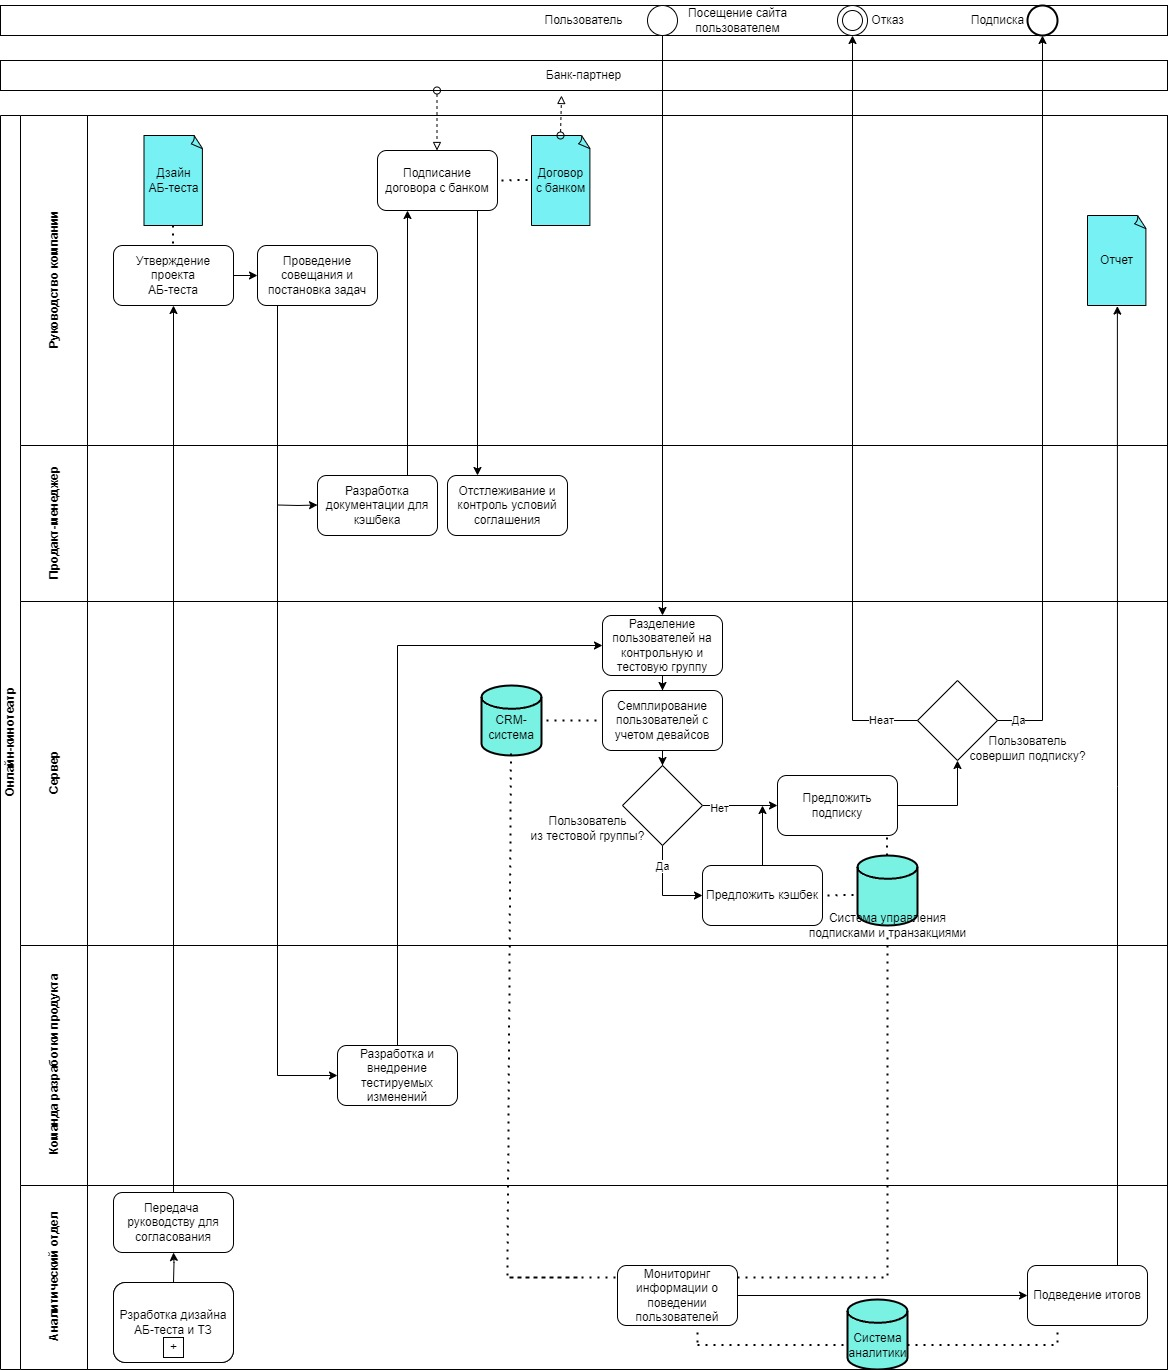.